# 데이터 전처리

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [5]:
from keras.datasets import mnist
from keras.datasets import fashion_mnist
(train_num_images, train_num_labels), (test_num_images, test_num_labels) = mnist.load_data()

(x_fashion_train, y_fashion_train), (x_fashion_test, y_fashion_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 3s 1us/step


# CNN층 만들기

In [9]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

In [11]:
from keras.datasets import mnist
from keras.utils import to_categorical



train_num_images = train_num_images.reshape((60000, 28, 28, 1))
train_num_images = train_num_images.astype('float32') / 255

test_num_images = test_num_images.reshape((10000, 28, 28, 1))
test_num_images = test_num_images.astype('float32') / 255

train_num_labels = to_categorical(train_num_labels)
test_num_labels = to_categorical(test_num_labels)

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_num_images, train_num_labels, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 15s 254us/step - loss: 0.1773 - accuracy: 0.9439
Epoch 2/5
60000/60000 [==============================] - 14s 241us/step - loss: 0.0482 - accuracy: 0.9843
Epoch 3/5
60000/60000 [==============================] - 15s 244us/step - loss: 0.0333 - accuracy: 0.9899
Epoch 4/5
60000/60000 [==============================] - 15s 243us/step - loss: 0.0255 - accuracy: 0.9919
Epoch 5/5
60000/60000 [==============================] - 15s 243us/step - loss: 0.0196 - accuracy: 0.9939


In [35]:
test_num_loss, test_num_acc = model.evaluate(test_num_images, test_num_labels)

10000/10000 [==============================] - 1s 70us/step


In [36]:
test_num_acc

0.9923999905586243

# fashion data로 predict

(28, 28, 1)


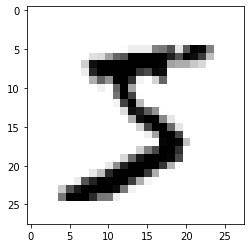

In [47]:
#x_fashion_test[0].reshape(28,28,1)
print(train_num_images[0].shape)

import matplotlib.pyplot as plt

digit = train_num_images[0]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [50]:
predict_train_n_0=model.predict(
    train_num_images[0].reshape(1,28,28,1),
    batch_size=None,
    verbose=0,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
)

In [60]:
print(predict_train_n_0)
print(np.argmax(predict_train_n_0))

[[3.2289466e-12 5.5251310e-09 1.6374737e-13 3.6161651e-03 5.5622965e-13
  9.9638355e-01 4.3937277e-11 2.0770566e-12 1.5842814e-07 1.7178755e-07]]
5


In [91]:
predict_train_f_0=model.predict(
    x_fashion_test[8].reshape(1,28,28,1),
    batch_size=None,
    verbose=0,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
)

In [93]:
print(predict_train_f_0)
print(np.argmax(predict_train_f_0))

[[0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 1.1238094e-26
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]
2


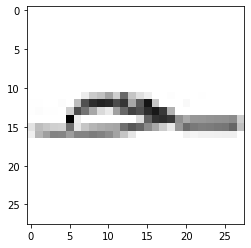

In [92]:
digit = x_fashion_test[8]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()